# Topic 8 Lab

Now that you know the basis of a CNN, you will run one of them in very few lines of code! To do so, we will use `Keras` with a `Tensorflow` backend, along with the very popular `mnist` dataset of handwritten numbers.

First, install the necessary packages if you don't have them already:

In [ ]:
# 0. Installing the necesssary packages
!pip install keras
!pip install tensorflow

     |████████████████████████████████| 462 kB 15.2 MB/s 


Then we will ensure that `Keras` uses `Tensorflow` as backend. Notice that if you prefer to use another backend such as `Theano`, you simply need to change the name in the second line of the code.

In [ ]:
# 1. Ensure you are using Theano backend
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

Now you will import the necessary packages:

In [6]:
# 2. Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

Then, we will set a **random seed** to be able to repeat the results and get the same results every time.

In [7]:
# 3. Set random seed (for reproducibility)
np.random.seed(123)

With the following cell you will download the data from the `mnist` dataset. Notice that the data comes already partitioned in test and training sets:

In [8]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Let's check the shape of the things obtained:

In [9]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Notice that we have 60'000 samples for training and 10'000 for testing.

Now we will preprocess the data to be used by the classifier. To be able to use Keras, we need to do the following:
1. **Reshape** the data into **four** dimensions i.e. the training set will be of shape (60000,28,28,1) and the test set of (10000,28,28). This is useful since the network needs an input shape of (1,28,28) **for each of the samples**.
2. Convert the format of the input into `float32` (apparently the CNN works better with it).
3. **Normalise** i.e. divide all values by 255.

In [10]:
# 5. Preprocess input data
# Reshape into four dimensions.
X_train_reshape = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Convert to float 32
X_train_reshape = X_train_reshape.astype('float32')
X_test_reshape = X_test_reshape.astype('float32')
# normalise
X_train_reshape /= 255 
X_test_reshape /= 255

CNNs also like their target to be categorical, i.e. instead of the target being values from 0 to 9, each target value will be a vector indicating which is the class according to the position. Run the following cell to see what I mean...

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


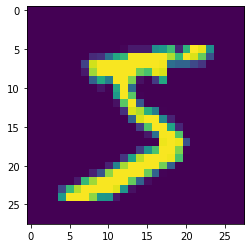

In [11]:
# 6. Preprocess class labels
Y_train_categorical = np_utils.to_categorical(Y_train, 10)
Y_test_categorical = np_utils.to_categorical(Y_test, 10)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
print(Y_train_categorical[0])
plt.imshow(X_train[0])

Now it's time to train the model. We will define a **sequential** CNN with two convolutional layers, a **max pooling** of size $2 \times 2$ and a **dropout** of $0.25$. Then, we will add a **flatten** layer, add a **densely connected** layer with a **ReLu** activation, afterwards add another **dropout** of $0.5$, and finally add a densely connected layer to the output with a **softmax** activation function. This configuration is not strict and you can find many different examples, such as [this other one](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d).

In [35]:
# 7. Define model architecture
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

To be congruent with what we saw on the lecture, let's see the model summary. Notice that before the dropout layer we had 589k features! But afterwards only 1290 are used.

In [36]:
# 8. Print a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               589952    
                                                      

After creating the model architecture, we will compile it. We will use the **ADAM** optimiser to improve the loss obtained by the **categorical cross entropy** method, and then we will request the model to obtain the accuracy

In [37]:
# 9. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

Once compiled, we will fit this model using our training data. If your computer is slow, I recommend you **NOT** to use the entire training dataset. This can be done by reducing the number `n` to something smaller than 60'000. Also, you can reduce the number of **epochs**.

In [45]:
# 10. Fit model on training data
n=30000 # In google colab, don't worry if you use all the data!

model.fit(X_train_reshape[:n], Y_train_categorical[:n], 
          batch_size=256, epochs=20, verbose=1) # verbose = 1 lets you see the training log for each iteration, higher values just gives you a summary

Epoch 1/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0131 - accuracy: 0.9957
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 4/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0109 - accuracy: 0.9964
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0113 - accuracy: 0.9961
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 8/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0106 - accuracy: 0.9962
Epoch 9/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0104 - accuracy: 0.9965
Epoch 10/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0118 - accura

We can try to add more `n` and epochs to see how much `training accuracy` we are capable to achieve. Also, keep in mind that if the `loss` is not going down, then the model is not learning! 

Now we can evaluate your model in the `test` data. We can as well obtain the `loss` and the `accuracy` for this new, unseen data for the model.

In [46]:
# 11. Evaluate model on test data
loss, accuracy = model.evaluate(X_test_reshape[:n], Y_test_categorical[:n], verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.04172112047672272 
Acc:  0.9901000261306763


With the following cell you can print the labels that were predicted by the model. Notice that the classes are not categorical anymore!

In [40]:
# 12. Check the labels that have been predicted
predict_x=model.predict(X_test[:n]) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[7 2 1 ... 4 5 6]


The next cell has a brief code that will help you find the incorrect labels by comparing the labels obtained for the test samples with their ground truth.

In [41]:
# 13. Check the label that has been predicted incorrectly
incorrect_labels=[]
accuracy = 0
for i,cla in enumerate(classes_x):
  if cla != Y_test[:n][i]:
    print("Sample "+str(i)+" was classified as "+str(cla)+" when it really was "+str(Y_test[:n][i]))

Sample 8 was classified as 6 when it really was 5
Sample 40 was classified as 8 when it really was 1
Sample 115 was classified as 9 when it really was 4
Sample 149 was classified as 8 when it really was 2
Sample 175 was classified as 9 when it really was 7
Sample 211 was classified as 8 when it really was 5
Sample 321 was classified as 7 when it really was 2
Sample 340 was classified as 3 when it really was 5
Sample 449 was classified as 5 when it really was 3
Sample 497 was classified as 8 when it really was 4
Sample 583 was classified as 8 when it really was 2
Sample 613 was classified as 8 when it really was 2
Sample 619 was classified as 8 when it really was 1
Sample 659 was classified as 1 when it really was 2
Sample 684 was classified as 9 when it really was 7
Sample 689 was classified as 9 when it really was 7
Sample 696 was classified as 8 when it really was 1
Sample 717 was classified as 6 when it really was 0
Sample 720 was classified as 8 when it really was 5
Sample 726 was 

Finally, you can use the following cell to print training or test cells from the dataset and see their actual (and predicted, for the case of test) labels.

Ground truth label:  1
Predicted label:  1


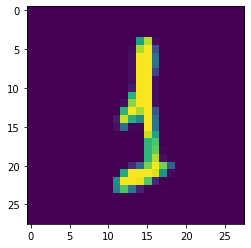

In [44]:
# 14. Show a sample from the mnist dataset
image_to_show = 900
from_group = 'test' # 'train' or 'test'
if from_group == 'train':
    plt.imshow(X_train[image_to_show])
    print('Ground truth label: ',Y_train[image_to_show])
else:
    plt.imshow(X_test[image_to_show])
    print('Ground truth label: ',Y_test[image_to_show])
    if len(predict_x)>image_to_show:
        print('Predicted label: ',classes_x[image_to_show])